# This program is developed by Soheil Hekmat for Question2(Cliff walking)

Importing Libraries

In [7]:
import gym
import numpy as np
import random
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
import warnings
warnings.filterwarnings('ignore')
clear_output()

Making environment of Cliff walking using 'gym AI toy text' and specifying it

we wanna see environment's features

In [8]:
env = gym.make('CliffWalking-v0')
spec = gym.spec('CliffWalking-v0')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(48)
Max Episode Steps: None
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None



Defining Actions Related to Environment

In [9]:
Actions =  {0: 'UP',
            1: 'RIGHT',
            2: 'DOWN',
            3: 'LEFT'}

taking some random actions to see how cliff walking works

(36, -1, False, {'prob': 1.0})
New Observation: 36
Reward: -1
Episode Done: False
Additional Info: {'prob': 1.0}
DOWN


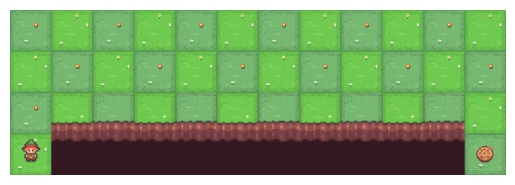

In [10]:
# here we take our environment into some actions, we do this randomly in a for loop.

env.reset()
action_seq= []

for i in range(1):
  action_number = env.action_space.sample()
  action_seq.append(Actions[action_number])
  info = env.step(action_number)
  print(env.step(action_number))   # Output: (int(s), r, termination, info(False, {"prob": p}))
  # here we Print the results after action
  print("New Observation:", list(info)[0])
  print("Reward:", list(info)[1])
  print("Episode Done:", list(info)[2])
  print("Additional Info:", list(info)[3])

print(' --> '.join(action_seq))
env_screen = env.render(mode='rgb_array',)
plt.imshow(env_screen)
plt.axis('off');


# QLearning

Defininig and Tuning Hyperparameters

In [5]:
# Training parameters
n_training_episodes = 10000  # Total training episodes
learning_rate = 0.01         # Learning rate

# Evaluation parameters
n_eval_episodes = 500        # Total number of test episodes

# Environment parameters
gamma = 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob

In [14]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

In [7]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable):
    for episode in tqdm(range(n_training_episodes)):
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
        # Reset the environment
        state = env.reset()
        step = 0
        terminated = False

        while not terminated:
          ######################################### Step 2 #################################
            # Choose the action (A_t) using epsilon greedy policy:
            random_num = random.uniform(0,1)
            # if random_num > greater than epsilon --> exploitation
            if random_num > epsilon:
                # Take the action with the highest value given a state
                # np.argmax can be useful here
                action = np.argmax(Qtable[state, :])
            # else --> exploration
            else:
                action = env.action_space.sample()

          ######################################### Step 3 #################################
            # Take action A_t and observe R_t+1 and S_t+1
            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, terminated, info = env.step(action)
            # step_result = env.step(action)
            # new_state, reward, terminated, info = step_result[:4]
            # state = int(state)
            # action = int(action)
            # new_state = int(new_state)

          ######################################### Step 4 #################################
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            Qtable[state, action] = Qtable[state, action] + learning_rate * (reward + gamma * np.max(Qtable[new_state, :]) - Qtable[state, action])

            # If terminated or truncated finish the episode
            if terminated:
                break

            # Our next state is the new state
            state = new_state
    return Qtable

using QLearning we try reaching the goal 3 times

In [8]:
num_try = 4
Qtable_ = np.zeros([num_try, env.observation_space.n, env.action_space.n])
for i in range(num_try):
  Qtable = initialize_q_table(env.observation_space.n, env.action_space.n)
  Qtable_[i,:,:] = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable)

100%|██████████| 10000/10000 [00:51<00:00, 194.52it/s]


Here is our Table for trying 3 times with 1000 training episodes

In [9]:
Qtable_

array([[[ -10.2907887 ,  -10.0086486 ,  -10.01028124,  -10.307689  ],
        [  -9.89676222,   -9.57749743,   -9.57872366,  -10.34445396],
        [  -9.47112866,   -9.07995188,   -9.08062834,   -9.96648055],
        [  -8.96893645,   -8.53982564,   -8.54107663,   -9.49407028],
        [  -8.43428461,   -7.96309538,   -7.963612  ,   -8.98364561],
        [  -7.85792058,   -7.35093197,   -7.3509474 ,   -8.43135688],
        [  -7.26525139,   -6.70106519,   -6.70123643,   -7.853216  ],
        [  -6.6045255 ,   -6.01259833,   -6.01274637,   -7.22650964],
        [  -5.93107529,   -5.2848758 ,   -5.28497867,   -6.58884556],
        [  -5.19720764,   -4.51682996,   -4.51690017,   -5.90170982],
        [  -4.45118822,   -3.70664754,   -3.70666853,   -5.16256797],
        [  -3.63160199,   -3.63541525,   -2.85236646,   -4.35806339],
        [ -10.43824373,   -9.72531076,   -9.72528494,  -10.1346597 ],
        [ -10.03068818,   -9.18937215,   -9.18936316,  -10.16616441],
        [  -9.570841

# Evaluating QLearning

In [70]:
def evaluate_agent(env, n_eval_episodes, Qtable):
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):

    state = env.reset()
    step = 0
    terminated = False
    total_rewards_ep = 0

    while not terminated:
      # Take the action (index) that have the maximum expected future reward given that state
      action = np.argmax(Qtable[state, :])
      new_state, reward, terminated, info = env.step(action)

      total_rewards_ep += reward

      if terminated:
        break
      state = new_state

    episode_rewards.append(total_rewards_ep)

  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward, episode_rewards

we wanna get mean and standard deviation of the returns

In [71]:
# Evaluate our Agent
for i in range(Qtable_.shape[0]):
  mean_reward, std_reward, episode_rewards = evaluate_agent(env, n_eval_episodes, Qtable_[i,:,:])
  print(f"\nMean_reward = {mean_reward:.2f} +/- {std_reward:.2f}\n")

100%|██████████| 100/100 [00:00<00:00, 3447.59it/s]



Mean_reward = -13.00 +/- 0.00



100%|██████████| 100/100 [00:00<00:00, 2889.02it/s]



Mean_reward = -13.00 +/- 0.00



100%|██████████| 100/100 [00:00<00:00, 3125.16it/s]



Mean_reward = -13.00 +/- 0.00



100%|██████████| 100/100 [00:00<00:00, 3770.03it/s]


Mean_reward = -13.00 +/- 0.00



so we have same mean and standard deviation for all tables with 100 test episodes.

we got -13 as mean reward which is the best we can reach based on our environment

# Rewards Plot

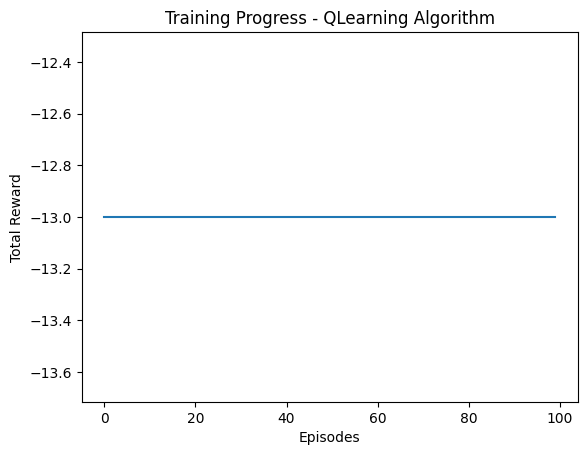

In [75]:
# Plotting the rewards
plt.plot(episode_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress - QLearning Algorithm')
plt.show()

# visualization

RIGHT --> RIGHT --> RIGHT --> RIGHT --> DOWN --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> DOWN --> RIGHT --> DOWN --> RIGHT --> DOWN --> RIGHT --> DOWN --> DOWN --> RIGHT --> DOWN --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> DOWN --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> DOWN --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP


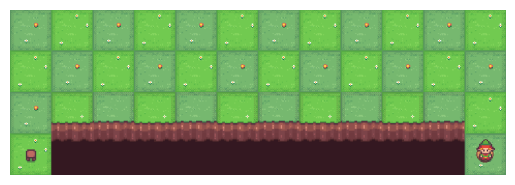

In [15]:
# Print sequence of actions that has taken to reach the goal
Qtable_selected = Qtable_[3]
action_sequence=[]
for j in range(Qtable_selected.shape[0]):
    action_sequence.append(Actions[np.argmax(np.array(Qtable_selected)[j, :])])
print(' --> '.join(action_sequence))
env_screen = env.render(mode = 'rgb_array',)
plt.imshow(env_screen)
plt.axis('off');

# SARSA

Hyperparameters

In [11]:
# Training parameters
n_training_episodes = 3000  # Total training episodes
#learning_rate = 0.15         # Learning rate

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
gamma = 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob
# Learning rate as an adaptive function
def adaptive_learning_rate(visit_count, min_learning_rate=0.01):
    # Use a function to define the learning rate based on the visit count
    return max(min_learning_rate, 1.0 / (1.0 + visit_count))

we do the same stages using sarsa algorithm which varies in Q's(reward func) update. in here we use random reward instead of max in Qlearning

In [12]:
def train_Sarsa(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable):
    visit_count = np.zeros_like(Qtable)

    for episode in tqdm(range(n_training_episodes)):
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
        # Reset the environment
        state = env.reset()
        step = 0
        terminated = False

        while not terminated:
          ######################################### Step 2 #################################
            # Choose the action (A_t) using epsilon greedy policy:
            random_num = random.uniform(0,1)
            # if random_num > greater than epsilon --> exploitation
            if random_num > epsilon:
                # Take the action with the highest value given a state
                # np.argmax can be useful here
                action = np.argmax(Qtable[state, :])
            # else --> exploration
            else:
                action = env.action_space.sample()

          ######################################### Step 3 #################################
            # Take action A_t and observe R_t+1 and S_t+1
            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, terminated, info = env.step(action)
            learning_rate = adaptive_learning_rate(visit_count[state, action])
          ######################################### Step 4 #################################
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # Qtable[state, action] = Qtable[state, action] + learning_rate * (reward + gamma * np.array(random.choices(Qtable[new_state, :],weights = [1, 1, 1, 1], k = 1)) - Qtable[state, action])
            Qtable[state, action] = Qtable[state, action] + learning_rate * (reward + gamma * np.array(random.choices(Qtable[new_state, :])) - Qtable[state, action])

            # If terminated or truncated finish the episode
            if terminated or (reward == -100):
                break

            # Our next state is the new state
            state = new_state
    return Qtable

In [15]:
num_try = 3
Qtable_s = np.zeros([num_try, env.observation_space.n, env.action_space.n])
for i in range(num_try):
  Qtable = initialize_q_table(env.observation_space.n, env.action_space.n)
  Qtable_s[i,:,:] = train_Sarsa(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable)

100%|██████████| 3000/3000 [00:26<00:00, 111.74it/s]


In [18]:
Qtable_s

array([[[-8.22712338e+02, -7.40809180e+02, -8.64960356e+02,
         -8.22712338e+02],
        [-8.18680532e+02, -8.51902750e+02, -8.60716350e+02,
         -7.78746506e+02],
        [-8.95687105e+02, -8.91996415e+02, -9.41775900e+02,
         -8.18680532e+02],
        [-9.37890963e+02, -7.73483821e+02, -9.86201014e+02,
         -8.95687105e+02],
        [-8.75939848e+02, -7.92485713e+02, -9.20989314e+02,
         -8.51902750e+02],
        [-8.33142856e+02, -7.80080231e+02, -8.54885120e+02,
         -8.33142856e+02],
        [-7.80080231e+02, -8.06477397e+02, -8.13140864e+02,
         -7.42076219e+02],
        [-8.91443099e+02, -8.06477397e+02, -9.06520170e+02,
         -8.54885120e+02],
        [-7.29795851e+02, -7.73483821e+02, -8.17172670e+02,
         -8.47870944e+02],
        [-8.98826442e+02, -8.13140864e+02, -8.59129127e+02,
         -8.54885120e+02],
        [-8.54885120e+02, -7.02468274e+02, -8.98826442e+02,
         -8.54885120e+02],
        [-7.73483821e+02, -7.38387657e+02, 

we can see that our table has values lower than -100 which means in sarsa we fall of the cliff most of the times. note that falling in cliff doesn't terminate the program!

# SARSA Eval

beacuse of this we use a new eval function for sarsa which terminates the search if reward is lower than -150(cliff falling).

In [19]:
def evaluate_sarsa(Qtable, env, n_episodes):
    total_return = 0
    std_reward = []
    for episode in range(n_episodes):
        state = env.reset()
        episode_return = 0
        terminated = False

        while not terminated:
            # Choose the action with the highest Q-value
            action = np.argmax(Qtable[state, :])

            # Take the selected action
            new_state, reward, terminated, _ = env.step(action)

            # Update the total return for the episode
            episode_return += reward

            # Move to the next state
            state = new_state

            if terminated or episode_return <= -150:
                break

        # # Print debugging information
        # print(f"Episode {episode + 1}, Return: {episode_return}")

        # Update the total return over all episodes
        total_return += episode_return
        std_reward.append(episode_return)
    # Calculate the average return
    average_return = total_return / n_episodes
    std_return = np.std(std_reward)
    return average_return, std_return, std_reward
# for i in range(Qtable_s.shape[0]):
#   # Assuming Qtable is the trained Q-table
#   average_return = evaluate_sarsa(Qtable_s[i,:,:], env, n_eval_episodes)
#   print("Average Return:", average_return)

In [20]:
for i in range(Qtable_s.shape[0]):
  # Assuming Qtable is the trained Q-table
  average_sarsa_return, std_sarsa_return, rewards_sarsa = evaluate_sarsa(Qtable_s[i,:,:], env, n_eval_episodes)
  print("Average Return:", average_sarsa_return)
  print("std Return:", std_sarsa_return)

Average Return: -150.0
std Return: 0.0
Average Return: -150.0
std Return: 0.0
Average Return: -150.0
std Return: 0.0


we can see that in every episode we have fallen into the cliff and sarsa isn't good for this environment with these policies and termination points.

# visualization

RIGHT --> LEFT --> LEFT --> UP --> LEFT --> LEFT --> LEFT --> RIGHT --> RIGHT --> RIGHT --> RIGHT --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> LEFT --> UP --> RIGHT --> UP --> RIGHT --> DOWN --> UP --> LEFT --> LEFT --> LEFT --> UP --> UP --> UP --> UP --> DOWN --> RIGHT --> RIGHT --> DOWN --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP --> UP


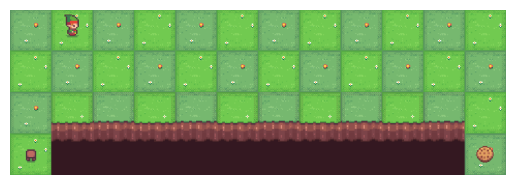

In [21]:
# Print sequence of actions that has taken to reach the goal
Qtable_selected = Qtable_s[2]
action_sequence=[]
for j in range(Qtable_selected.shape[0]):
    action_sequence.append(Actions[np.argmax(np.array(Qtable_selected)[j, :])])
print(' --> '.join(action_sequence))
env_screen = env.render(mode = 'rgb_array',)
plt.imshow(env_screen)
plt.axis('off');

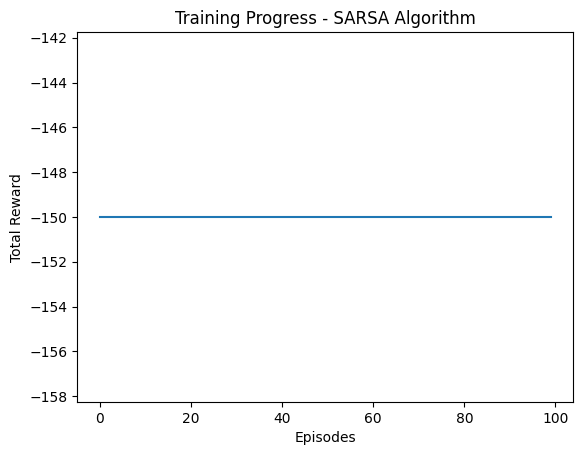

In [23]:
# Plotting the rewards
plt.plot(rewards_sarsa)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress - SARSA Algorithm')
plt.show()